## Laptop Bhinneka Web Scraper
### Razan Aditya Putra (18221132)
### Tugas Seleksi Calon Asisten Lab Basis Data

## Import Library Yang Diperlukan

In [2]:
import os
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import json
import requests

## Main Program Untuk Scraping Data Dari Website

In [8]:
# Mengambil HTML dari website
baseurl = 'https://www.bhinneka.com'
url = 'https://www.bhinneka.com/jual?cari=laptop'
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36'}
driver = webdriver.Chrome()
driver.get(url)
requests.get(url, headers=headers).text
Data_Laptop_Bhinneka = []

# Kode untuk web scraping
for i in range(40):
    print("processing data page", i+1)
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#__next")))
    time.sleep(1)

    # Scroll page sampai bagian terakhir dari produk pada halaman tertentu
    for j in range(12):
        driver.execute_script("window.scrollBy(0, 250)")
        time.sleep(1)

    driver.execute_script("window.scrollBy(50, 0)")
    time.sleep(1)
    soup = BeautifulSoup (driver.page_source, "lxml")
    for item in soup.findAll('div', class_='col css-mz9zn6'): 
        nama_produk = item.find('p', class_='css-194yrqz').text
        harga = item.find('div', class_='price').text
        cicilan = item.find('span', class_='extra').text
        link_toko = item.find('a', href=True)
        suburl = baseurl + link_toko['href']
        driver.execute_script("window.open(arguments[0]);", suburl)
        driver.switch_to.window(driver.window_handles[1])
        subsoup = BeautifulSoup(driver.page_source, 'lxml')
        info_detail = []
        try:
            garansi = subsoup.find('div', class_='css-1vpacho').text
            keunggulan = subsoup.find('div', class_='css-zmjj1a').text
            spec = subsoup.find('table', class_='css-14oykdy').text
            desc = subsoup.find('div', class_='css-116d6nl').text
            estimate = subsoup.findAll('div', class_='css-1ksog4')[2].div.text
            rate = subsoup.findAll('div', class_='totalRate')
            for rating in rate:
                star = rating.find('h4').text
            more_detail = {
                "garansi" : garansi,
                "keunggulan" : keunggulan,
                "spesifikasi" : spec,
                "deskripsi" : desc,
                "estimasi" : estimate,
                "rating" : star,
            }
            info_detail.append(more_detail)
            time.sleep(1)
        except AttributeError:
            pass
        except IndexError:
            pass
        except ValueError:
            pass
        
        for item2 in item.findAll('div', class_='merchant-info css-ejq1bh'):
            lokasi = item2.findAll('span')[0].text
            toko = item2.findAll('span')[1].text 

        data_laptop = {
            "nama_produk" : nama_produk,
            "harga" : harga,
            "cicilan" : cicilan,
            "nama_toko" : toko,
            "lokasi_toko" : lokasi,
            "info_detail" : info_detail,
        }
        Data_Laptop_Bhinneka.append(data_laptop)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])

    # Berpindah ke halaman selanjutnya
    time.sleep(1)
    driver.find_element(By.CSS_SELECTOR, "button[data-testid^='next-button']").click()
    time.sleep(1)
    driver.execute_script("window.scrollBy(0, -3000)")
    time.sleep(1)

# Menutup driver setelah selesai dijalankan
driver.quit()

processing data page 1
processing data page 2
processing data page 3
processing data page 4
processing data page 5
processing data page 6
processing data page 7
processing data page 8
processing data page 9
processing data page 10
processing data page 11
processing data page 12
processing data page 13
processing data page 14
processing data page 15
processing data page 16
processing data page 17
processing data page 18
processing data page 19
processing data page 20
processing data page 21
processing data page 22
processing data page 23
processing data page 24
processing data page 25
processing data page 26
processing data page 27
processing data page 28
processing data page 29
processing data page 30
processing data page 31
processing data page 32
processing data page 33
processing data page 34
processing data page 35
processing data page 36
processing data page 37
processing data page 38
processing data page 39
processing data page 40


## Menyimpan Data Dalam Bentuk JSON File

In [9]:
path = 'C:\Coding\Python\Seleksi-2023-Tugas-1\Data Scraping\data'
file_name = 'Data_Laptop_Bhinneka.json'
file_path = os.path.join(path, file_name)
with open(file_path, 'w', encoding = 'utf-8') as file:
    json.dump(Data_Laptop_Bhinneka, file, ensure_ascii = False, indent = 4)
print("Done exporting json file.")

Done exporting json file.


## Menambahkan Kolom Id Ke Setiap Item Pada File JSON

In [10]:
with open('C:\Coding\Python\Seleksi-2023-Tugas-1\Data Scraping\data\Data_Laptop_Bhinneka.json') as f:
    data = json.load(f)

for i, item in enumerate(data):
    item['id'] = i + 1

with open('C:\Coding\Python\Seleksi-2023-Tugas-1\Data Scraping\data\Data_Laptop_Bhinneka.json', 'w') as f:
    json.dump(data, f, indent=4)
print("ファイルに新しいカラムが追加された!!")

ファイルに新しいカラムが追加された!!


# BONUS

##### Menampilkan isi dari file JSON

In [22]:
data = pd.read_json('C:\Coding\Python\Seleksi-2023-Tugas-1\Data Scraping\data\Data_Laptop_Bhinneka.json')
data

,nama_produk,harga,cicilan,nama_toko,lokasi_toko,info_detail,id
0,CORSAIR Memory Notebook 4GB DDR3L PC-12800 CMS...,Rp 449.500,Cicilan Rp 37.459/bln,Bhinneka,Tanjung Priok,[{'garansi': '3 Years Local Official Distribut...,1
1,Sewa Laptop Amanah Lenovo Legion 5 (Periode 1 ...,Rp 757.000,Cicilan Rp 63.084/bln,Amanah Sewa Laptop,Kebon Jeruk,[],2
2,Sewa Laptop Amanah Dell Latitude E3340 (Period...,Rp 151.000,Cicilan Rp 12.584/bln,Amanah Sewa Laptop,Kebon Jeruk,[],3
3,Sewa Laptop Amanah HP 820m G2 (Periode 1 Hari),Rp 202.000,Cicilan Rp 16.834/bln,Amanah Sewa Laptop,Kebon Jeruk,[],4
4,Sewa Laptop Amanah Dell 7280 (Periode 1 hari),Rp 303.500,Cicilan Rp 25.292/bln,Amanah Sewa Laptop,Kebon Jeruk,[],5
...,...,...,...,...,...,...,...
1595,KELENDIS KX-1201 15.6 Inch Laptop Backpack USB...,Rp 185.000,Cicilan Rp 15.417/bln,lacarla,Grogol Petamburan,[],1596
1596,COOLBELL CB-8001 15.6 Grey Waterproof Anti-The...,Rp 149.000,Cicilan Rp 12.417/bln,lacarla,Grogol Petamburan,[],1597
1597,WIWU Skin Pro Platinum 14.2 - Microfiber Leath...,Rp 259.000,Cicilan Rp 21.584/bln,lacarla,Grogol Petamburan,[],1598
1598,DTBG D8006W 17.3 Inch Grey - Laptop Backpack U...,Rp 285.000,Cicilan Rp 23.750/bln,lacarla,Grogol Petamburan,[],1599


##### Menampilkan data nama toko yang menjual lebih dari 50 produk

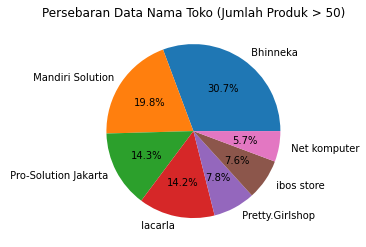

In [21]:
data2 = data["nama_toko"].value_counts()
data3 = data2[data2 > 50]

# Menghitung persentase tiap bagian
total_count = data3.sum()
data3_percent = data3 / total_count * 100

# Membuat diagram pie dengan persentase tiap bagian
plt.pie(data3_percent, labels=data3_percent.index, autopct='%1.1f%%')
plt.title('Persebaran Data Nama Toko (Jumlah Produk > 50)')
plt.show()

Dari data di atas didapat nama toko apa saja yang menjual barang lebih dari 50 produk.
Nama toko tersebut adalah Bhinneka, Net Komputer, ibos store, Pretty Girlshop, lacarla, Pro-Solution Jakarta, dan Mandiri Solution.
Data ini dapat membantu konsumen untuk memilih produk dari toko yang sudah menjual banyak produk.

#### ----------------------------------------------------------------------------------------------------------------------------------------------

##### Menampilkan jumlah dari produk dengan harga yang sama lebih dari 9

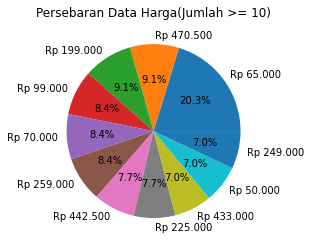

In [18]:
data2 = data["harga"].value_counts()
data3 = data2[data2 >= 10]
# Menghitung persentase tiap bagian
total_count = data3.sum()
data3_percent = data3 / total_count * 100

# Membuat diagram pie dengan persentase tiap bagian
plt.pie(data3_percent, labels=data3_percent.index, autopct='%1.1f%%')
plt.title('Persebaran Data Harga(Jumlah >= 10)')
plt.show()

Terdapat 11 produk dengan harga yang sama dijual pada platform bhinneka kategori laptop.
Harga dengan jumlah sama terbanyak terdapat pada angka Rp 65.000 dengan persentase 20.3%

#### ----------------------------------------------------------------------------------------------------------------------------------------------

##### Menampilkan lokasi toko yang sama lebih dari 50 

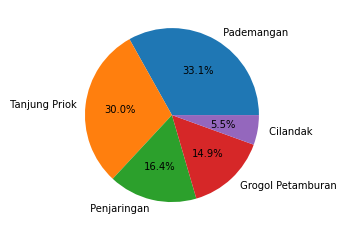

In [20]:
data2 = data["lokasi_toko"].value_counts()
data3 = data2[data2 > 50]
# Menghitung persentase tiap bagian
total_count = data3.sum()
data3_percent = data3 / total_count * 100

# Membuat diagram pie dengan persentase tiap bagian
plt.pie(data3_percent, labels=data3_percent.index, autopct='%1.1f%%')
plt.show()

Asal lokasi toko terbanyak terdapat pada daerah Pademangan dengan persentase 33.1% dari seluruh lokasi yang jumlahnya di atas 50